In [27]:
import pandas as pd
import numpy as np
from PIL import Image
import random

In [28]:
img = Image.open('assignment k means pic.jpg')

In [29]:
w, h = img.size

In [30]:
rgb_values = []
for y in range(h):
    for x in range(w):
        pixelvalue = img.getpixel((x,y))
        rgb_values.append(pixelvalue)

In [31]:
df =pd.DataFrame(rgb_values, columns=['Red', 'Green','Blue'])

In [32]:
df.shape

(540000, 3)

In [33]:
df.head()

,Red,Green,Blue
0,99,144,177
1,97,142,175
2,95,140,171
3,92,137,168
4,90,135,164


# Using SKlearn library

In [34]:
from sklearn.cluster import KMeans

wcss1 = []

for i in range(1,8):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss1.append(km.inertia_)

C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Monil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

## Elbow curve using sklean library

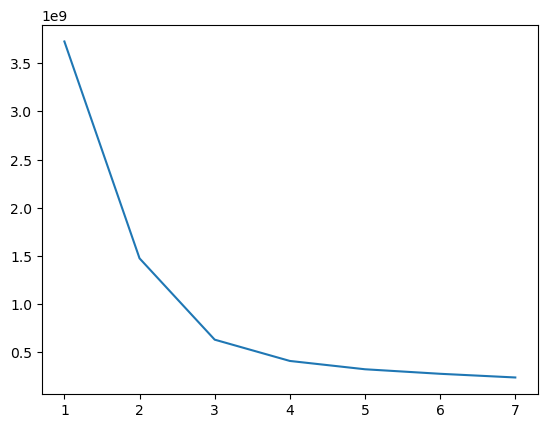

[3726502401.810455, 1475483976.6071124, 631426307.8557994, 410466083.23276234, 324108303.5661393, 277164028.3532463, 238894766.34194356]


In [35]:
#PLotting WCSS with out sklearn code
import matplotlib.pyplot as plt
plt.plot(range(1,8), wcss1)
plt.show()
print(wcss1)

# KMeans clustering own code

In [36]:
X = df.values
wcss=[]
for k in range(1,8):
    random_index = random.sample(range(0, df.shape[0]), k)
    initial_cent = X[random_index]

    for m in range(100):
        
        # Assign Cluster
        assign_cluster =[]
        for row in X:
            distance=[]
            for centroid in initial_cent:
                distance.append(np.sqrt(np.dot(row-centroid, row-centroid)))
            index = distance.index(min(distance))
            assign_cluster.append(index)
        assign_cluster = np.array(assign_cluster)           
        
        # New centroids
        old_cent = initial_cent
        uni_cluster_no = np.unique(assign_cluster)
        cen_new =[]
        for cluster_no in uni_cluster_no:
            cen_new.append(X[assign_cluster == cluster_no].mean(axis=0))

        initial_cent = np.array(cen_new)
        
        # Check convergence
        if(old_cent == initial_cent).all():
            wcss1 = 0
            for i in uni_cluster_no:
                X1=X[assign_cluster==i]
                for j in X1:
                    wcss1 = wcss1 + np.dot((j - initial_cent[i]),(j - initial_cent[i]))
            wcss.append(wcss1)
            break

    print('Total iteration run:',m+1)
    print('Final Centroids are:',initial_cent)
print(wcss)

Total iteration run: 2
Final Centroids are: [[ 91.36714074 121.22322593 102.45025556]]
Total iteration run: 17
Final Centroids are: [[240.01088295 207.05198508  36.48902425]
 [ 73.0416489  110.64185733 110.58226292]]
Total iteration run: 23
Final Centroids are: [[ 87.23853874 132.60234313 135.12367983]
 [240.44551984 207.28641774  36.04195745]
 [ 53.77661094  80.67053168  76.95923514]]
Total iteration run: 27
Final Centroids are: [[240.53491497 207.34185374  35.92363946]
 [ 46.81250664  67.27416891  64.83533362]
 [ 96.35988576 144.0856671  151.578033  ]
 [ 72.15143359 112.51138394 108.40530603]]
Total iteration run: 36
Final Centroids are: [[ 80.9553867  125.57165298 123.05956585]
 [240.60838994 207.38977135  35.87130769]
 [101.78834406 149.29707354 161.97630183]
 [ 42.16930999  56.9541024   56.73378366]
 [ 61.90443319  96.88845994  91.27340375]]
Total iteration run: 60
Final Centroids are: [[ 38.17539777  48.43750994  50.14087112]
 [ 55.08939314  84.56350406  78.89217973]
 [240.643880

## Elbow curve with own code calculation

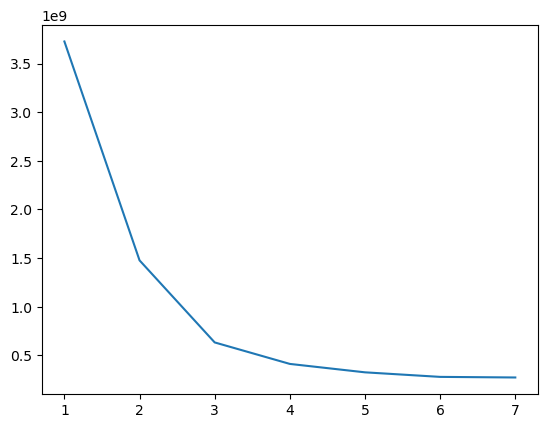

In [38]:
#PLotting WCSS with out own written code 
plt.plot(range(1,8), wcss)

In [40]:
print(wcss)

[3726502401.8107123, 1475483975.7882957, 631424263.6931089, 410459153.8548523, 323940392.8761571, 277095221.5439117, 271016362.74546313]
